# Deplyment of semi unsupervised learning on ATLAS OpenData
### Testing of reading in data and trying an auto encoder
Remember to install the necessary api's for usage in Galaxy

In [1]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
#import keras_tuner as kt
import plot_set
import os
seed = tf.random.set_seed(1)
#import ROOT as R

In [6]:
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

df_atlas = pd.read_hdf("/storage/shared/data/2lep_df_forML_data_fromRDF.hdf5")
df = pd.read_hdf("/storage/shared/data/2lep_df_forML_bkg_signal_fromRDF.hdf5")


#weights = pd.read_csv("weights.csv")

In [7]:
df.info()
df_atlas.info()
#weights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109683372 entries, 0 to 109683371
Data columns (total 39 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   njet20                     int32  
 1   njet60                     int32  
 2   nbjet60                    int32  
 3   nbjet70                    int32  
 4   nbjet77                    int32  
 5   nbjet85                    int32  
 6   isOS                       int32  
 7   isSF                       int32  
 8   mll                        float32
 9   mt2                        float32
 10  met_et                     float32
 11  met_phi                    float32
 12  lep1_flav                  int32  
 13  lep1_pt                    float32
 14  lep1_eta                   float32
 15  lep1_phi                   float32
 16  lep1_E                     float32
 17  lep1_ptcone30              float32
 18  lep1_etcone20              float32
 19  lep1_trackd0pvunbiased     float32
 20

In [8]:
df["physdescr"]

0                            Zee
1                            Zee
2                            Zee
3                            Zee
4                            Zee
                    ...         
109683367    Zee_PTV0_70_BFilter
109683368    Zee_PTV0_70_BFilter
109683369    Zee_PTV0_70_BFilter
109683370    Zee_PTV0_70_BFilter
109683371    Zee_PTV0_70_BFilter
Name: physdescr, Length: 109683372, dtype: object

### Adding more columns 
Because the dataset is lacking the "isSignal" and "weight" columns, we have to create them our self

In [9]:
df["category"].unique()

array(['Zjetsincl', 'Zjets', 'Diboson', 'Higgs', 'singleTop', 'topX',
       'RS_G_ZZ', 'SUSYC1N2', 'Wjets', 'SUSYC1C1', 'dmV_Zll', 'ttbar',
       'GG_ttn1', 'ZPrimett', 'Gee', 'SUSYSlepSlep', 'ZPrimeee',
       'ZPrimemumu', 'Wjetsincl', 'Gmumu', 'TT_directTT'], dtype=object)

In [10]:
signals = ['ZPrimemumu', 'SUSYC1C1', 'RS_G_ZZ', 'SUSYSlepSlep', 'SUSYC1N2', 'ZPrimett', 'ZPrimeee', 'dmV_Zll', 'GG_ttn1', 'TT_directTT', 'Gee', 'Gmumu']

In [11]:
issignal = np.where(df["category"].isin(signals)  , 1, 0)

In [12]:
df = df.assign(isSignal=issignal)

In [13]:
df.head(2)

,njet20,njet60,nbjet60,nbjet70,nbjet77,nbjet85,isOS,isSF,mll,mt2,...,lep2_trackd0pvunbiased,lep2_tracksigd0pvunbiased,lep2_isTightID,lep2_z0,channelNumber,costhstar,weight,category,physdescr,isSignal
0,0,0,0,0,0,0,1,1,83241.078125,203008.812500,...,-0.022843,0.767920,1.0,0.000382,361106,0.113907,0.127318,Zjetsincl,Zee,0
1,1,0,0,0,0,0,1,1,91189.015625,115910.992188,...,-0.001654,0.100329,1.0,-0.136329,361106,0.864449,0.114645,Zjetsincl,Zee,0


Remove W jets include and Z jets include

In [14]:
zjetsinl_idx = df[df["category"] == "Zjetsincl"].index
wjetsinl_idx = df[df["category"] == "Wjetsincl"].index

In [15]:
df.drop(zjetsinl_idx ,inplace=True)
df.drop(wjetsinl_idx ,inplace=True)

In [16]:
df_atlas.head(2)


,njet20,njet60,nbjet60,nbjet70,nbjet77,nbjet85,isOS,isSF,mll,mt2,...,lep2_E,lep2_ptcone30,lep2_etcone20,lep2_trackd0pvunbiased,lep2_tracksigd0pvunbiased,lep2_isTightID,lep2_z0,channelNumber,costhstar,weight
0,1,0,0,0,0,0,1,1,12510.837891,57409.433594,...,10032.247070,1196.712769,-92.074127,-0.000793,0.044793,1.0,-0.024559,300800,0.131353,1.0
1,1,0,0,0,0,0,1,1,91430.445312,192062.109375,...,192062.109375,0.000000,-174.402069,0.003242,0.373168,1.0,-0.064178,300800,0.323297,1.0


In [17]:
df.columns

Index(['njet20', 'njet60', 'nbjet60', 'nbjet70', 'nbjet77', 'nbjet85', 'isOS',
       'isSF', 'mll', 'mt2', 'met_et', 'met_phi', 'lep1_flav', 'lep1_pt',
       'lep1_eta', 'lep1_phi', 'lep1_E', 'lep1_ptcone30', 'lep1_etcone20',
       'lep1_trackd0pvunbiased', 'lep1_tracksigd0pvunbiased', 'lep1_isTightID',
       'lep1_z0', 'lep2_flav', 'lep2_pt', 'lep2_eta', 'lep2_phi', 'lep2_E',
       'lep2_ptcone30', 'lep2_etcone20', 'lep2_trackd0pvunbiased',
       'lep2_tracksigd0pvunbiased', 'lep2_isTightID', 'lep2_z0',
       'channelNumber', 'costhstar', 'weight', 'category', 'physdescr',
       'isSignal'],
      dtype='object')

### Data separation

In [18]:
categories = df["category"]

background_categories = df[df["isSignal"] == 0]["category"].unique()
signal_df = df[df["isSignal"] == 1]
signal_df = signal_df[signal_df["category"] != "Gmumu"]

background_df = df[df["isSignal"] == 0]




In [19]:
#sig = df[df["isSignal"] == 1]["weight"]
#print("Signal MC weights")
#print("****************")

#tot = 0
#for sig in signals:

#sign = df[df["category"]== sig]["weight"]
#print("{}: {:.2f}".format(sig, np.sum(sign)))
#tot += np.sum(sign)
    
#print("***************")
#print("{:e}".format(tot))

In [20]:
b = df[df["isSignal"]==0]["weight"]
print("Background MC weight total")
print("{:e}".format(np.sum(b)))

Background MC weight total
1.078580e+07


In [21]:
background_df.columns

Index(['njet20', 'njet60', 'nbjet60', 'nbjet70', 'nbjet77', 'nbjet85', 'isOS',
       'isSF', 'mll', 'mt2', 'met_et', 'met_phi', 'lep1_flav', 'lep1_pt',
       'lep1_eta', 'lep1_phi', 'lep1_E', 'lep1_ptcone30', 'lep1_etcone20',
       'lep1_trackd0pvunbiased', 'lep1_tracksigd0pvunbiased', 'lep1_isTightID',
       'lep1_z0', 'lep2_flav', 'lep2_pt', 'lep2_eta', 'lep2_phi', 'lep2_E',
       'lep2_ptcone30', 'lep2_etcone20', 'lep2_trackd0pvunbiased',
       'lep2_tracksigd0pvunbiased', 'lep2_isTightID', 'lep2_z0',
       'channelNumber', 'costhstar', 'weight', 'category', 'physdescr',
       'isSignal'],
      dtype='object')

### Plot to check somewhat agreement with data and MC

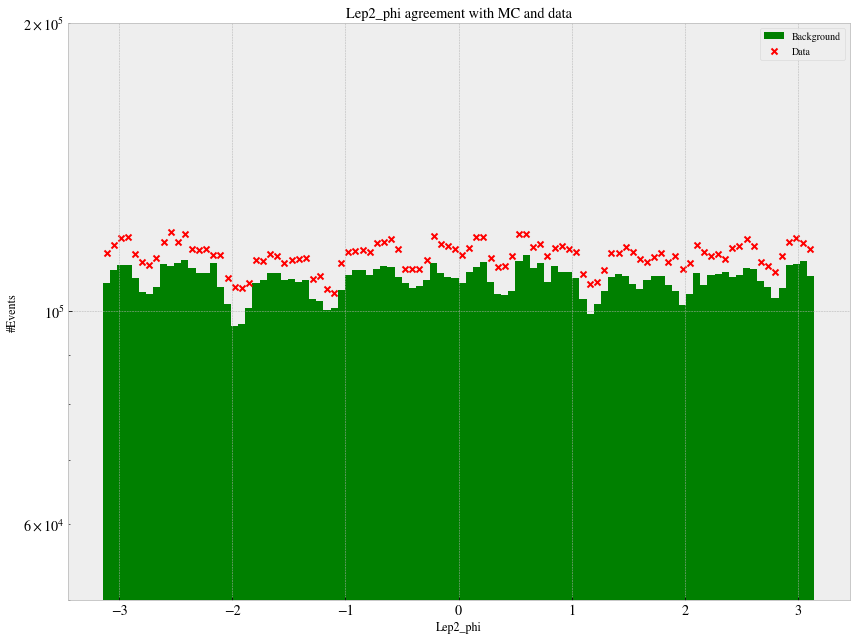

In [22]:
histo_b = background_df["lep2_phi"]
histo_data = df_atlas["lep2_phi"]
weight_histo = background_df["weight"]
                
plt.rcParams["figure.figsize"] = (12,9)
fig, ax = plt.subplots()

N, bins = np.histogram(histo_data, bins = 100)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

n_bins= 100
colors = ["green"]
labels= ["Background"]
ax.hist(histo_b, 
        n_bins,   
        histtype='bar', 
        color=colors, 
        label=labels, 
        weights=weight_histo
        )

ax.scatter(x, N, marker="x", color="red",label="Data")

ax.legend(prop={'size': 10})
ax.set_title('Lep2_phi agreement with MC and data')
ax.set_xlabel('Lep2_phi')
ax.set_ylabel('#Events')
ax.set_yscale('log')
ax.set_ylim([5e4, 2e5])

fig.tight_layout()
#plt.savefig("b_s_recon.pdf")
plt.show()

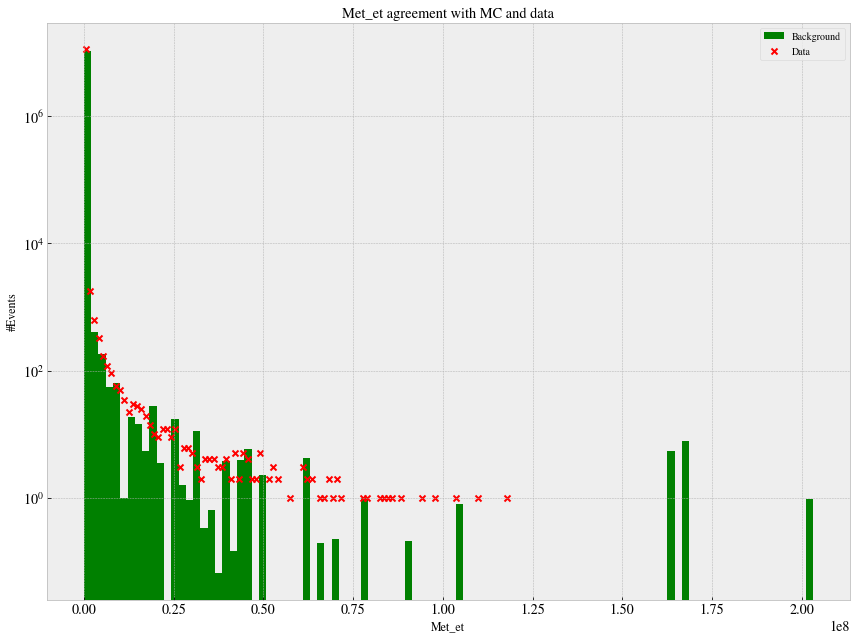

In [23]:
histo_b = background_df["met_et"]
histo_data = df_atlas["met_et"]

weight_histo = background_df["weight"]
                
plt.rcParams["figure.figsize"] = (12,9)
fig, ax = plt.subplots()

N, bins = np.histogram(histo_data, bins = 100)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

n_bins= 100
colors = ["green"]
labels= ["Background"]
ax.hist(histo_b, 
        n_bins,   
        histtype='bar', 
        color=colors, 
        label=labels, 
        weights=weight_histo
        )

ax.scatter(x, N, marker="x", color="red",label="Data")

ax.legend(prop={'size': 10})
ax.set_title('Met_et agreement with MC and data')
ax.set_xlabel('Met_et')
ax.set_ylabel('#Events')
ax.set_yscale('log')
#ax.set_ylim([5e4, 2e5])

fig.tight_layout()
#plt.savefig("b_s_recon.pdf")
plt.show()

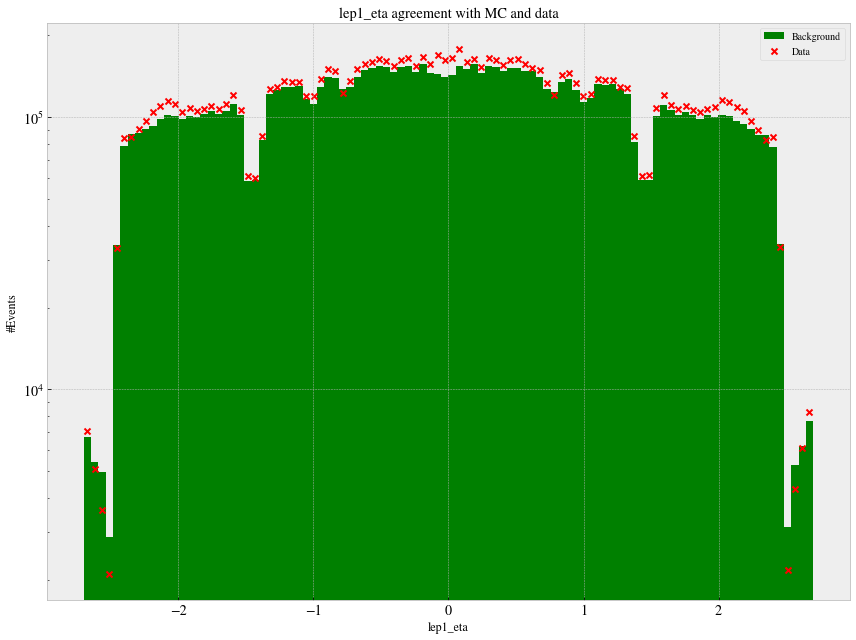

In [24]:
histo_b = background_df["lep1_eta"]
histo_data = df_atlas["lep1_eta"]

weight_histo = background_df["weight"]
                
plt.rcParams["figure.figsize"] = (12,9)
fig, ax = plt.subplots()

N, bins = np.histogram(histo_data, bins = 100)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

n_bins= 100
colors = ["green"]
labels= ["Background"]
ax.hist(histo_b, 
        n_bins,   
        histtype='bar', 
        color=colors, 
        label=labels, 
        weights=weight_histo
        )

ax.scatter(x, N, marker="x", color="red",label="Data")

ax.legend(prop={'size': 10})
ax.set_title('lep1_eta agreement with MC and data')
ax.set_xlabel('lep1_eta')
ax.set_ylabel('#Events')
ax.set_yscale('log')
#ax.set_ylim([5e4, 2e5])

fig.tight_layout()
#plt.savefig("b_s_recon.pdf")
plt.show()

### Remove bad features

In [25]:
columns_to_drop = ["physdescr"] # "isSignal"

signal_df.drop(columns_to_drop, axis=1, inplace=True)
background_df.drop(columns_to_drop, axis=1, inplace=True)

#bad_feats = ["lep1_eta", "lep2_eta", "lep1_phi", "lep2_phi", "met_phi", "lep2_isTightID", "lep1_isTightID", "nbjet60", "nbjet70", "nbjet77"]
bad_feats= ["channelNumber", "lep1_tracksigd0pvunbiased", "lep2_tracksigd0pvunbiased"]


signal_df.drop(bad_feats, axis=1, inplace=True)
background_df.drop(bad_feats, axis=1, inplace=True)
df_atlas.drop(bad_feats, axis=1, inplace=True)

signal_mc = signal_df#.to_numpy()
background_mc = background_df#.to_numpy()

data = df_atlas

/storage/software/easybuild/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
print(np.shape(background_mc))
print(np.shape(signal_mc))
print(np.shape(data))


(63642138, 36)
(2656314, 36)
(11442336, 34)


### Data handling and preperations
Before we train on the data, we need to scale it and split it into a validation and 

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [28]:
# Split background
X_b_train, X_b_val = train_test_split(background_mc, test_size=0.2, random_state=seed)
# Split signal
#X_s_train, X_s_test = train_test_split(signal_mc, test_size=0.2, random_state=seed)

Now, combine samples for testing

In [29]:
b_train_weights = X_b_train["weight"]
b_val_weights = X_b_val["weight"]
s_test_weights = signal_mc["weight"]

data_weights = data["weight"]

b_train_labels = X_b_train["isSignal"]
b_val_labels = X_b_val["isSignal"]
s_test_labels = signal_mc["isSignal"]

b_train_category = X_b_train["category"]
b_val_category = X_b_val["category"]
s_test_category = signal_mc["category"]


X_b_train.pop("category")
X_b_val.pop("category")
signal_mc.pop("category")

X_b_train.pop("isSignal")
X_b_val.pop("isSignal")
signal_mc.pop("isSignal")

X_b_train.pop("weight")
X_b_val.pop("weight")
signal_mc.pop("weight")

data.pop("weight")

X_s_test = signal_mc

In [30]:
test_set = np.concatenate((X_b_val, signal_mc),0)
test_labels = np.concatenate((b_val_labels, s_test_labels),0)
test_weights = np.concatenate((b_val_weights, s_test_weights),0)
test_categories = np.concatenate((b_val_category, s_test_category),0)

In [31]:
print(np.sum(s_test_weights))
print(np.sum(np.concatenate((b_train_weights, b_val_weights),0)))

184556.56802465554
10785795.659772972


### Find that weights correct for sample size

In [32]:
#sum_weight = np.concatenate((b_train_weights, b_val_weights), 0)
#sum_weight = np.sum(sum_weight)

In [33]:
#print(sum_weight) 
#diff = abs(data.shape[0]- sum_weight)
#print(f"Difference in weights compared to amount of data is {diff/data.shape[0]*100:.3f}%")

In [34]:
print(np.shape(X_b_train))
print(np.shape(X_s_test))
print(np.shape(data))

(50913710, 33)
(2656314, 33)
(11442336, 33)


In [35]:
strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")

with strategy.scope():

    scaler_ae = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    X_b_train = scaler_ae.fit_transform(X_b_train)                                                                                                                                                                                                                        
    test_set = scaler_ae.transform(test_set)                                                                                                                                                                                                                                 
    
    data = scaler_ae.transform(data)
#X_test = scaler_ae.transform(X_test)

/storage/software/easybuild/software/TensorFlowAnalysis/1.0.0-fosscuda-2020b/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [36]:
data_shape = np.shape(X_b_train)[1]
number_of_rows = np.shape(X_b_train)[0]
n_vali = np.shape(X_b_val)[0]


b_grid_train, b_grid_test = train_test_split(X_b_train, test_size=0.2, random_state=seed)

random_indices_b = np.random.choice(np.shape(b_grid_train)[0], size=int(1e7), replace=False)
test_indices_b = np.random.choice(np.shape(b_grid_test)[0], size=int(2e6), replace=False)

smaller_data = b_grid_train[random_indices_b, :]
small_vali = b_grid_test[test_indices_b, :]



Try to load data faster

In [37]:
#X_b_train = tf.data.Dataset.from_tensor_slices((X_b_train, X_b_train))
#X_b_val = tf.data.Dataset.from_tensor_slices((X_b_val, X_b_val))
#X_s_test = tf.data.Dataset.from_tensor_slices((X_s_test, X_s_test))
#data = tf.data.Dataset.from_tensor_slices((data, data))
#smaller_data = tf.data.Dataset.from_tensor_slices((smaller_data, smaller_data))
#small_vali = tf.data.Dataset.from_tensor_slices((small_vali, small_vali))

### Training
Now we can train on the data

In [38]:
#tf.config.optimizer.set_jit( "autoclustering")
def gridautoencoder(X_b, X_back_test):
    tuner = kt.Hyperband(
        AE_model_builder,
        objective=kt.Objective("val_mse", direction="min"),
        max_epochs=15,
        factor=3,
        directory="GridSearches",
        project_name="AE",
        overwrite=True,
    )

    tuner.search(X_b, X_b, epochs=15, batch_size=8192,
                 validation_data=(X_back_test, X_back_test))
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(
        f"""
    For Encoder: \n 
    First layer has {best_hps.get('num_of_neurons1')} with activation {best_hps.get('1_act')} \n
    Second layer has {best_hps.get('num_of_neurons2')} with activation {best_hps.get('2_act')} \n
    Third layer has {best_hps.get('num_of_neurons3')} with activation {best_hps.get('3_act')} \n
    
    Latent layer has {best_hps.get("lat_num")} with activation {best_hps.get('2_act')} \n
    \n
    For Decoder: \n 
    First layer has {best_hps.get('num_of_neurons5')} with activation {best_hps.get('5_act')}\n
    Second layer has {best_hps.get('num_of_neurons6')} with activation {best_hps.get('6_act')}\n
    Third layer has {best_hps.get('num_of_neurons7')} with activation {best_hps.get('7_act')}\n
    Output layer has activation {best_hps.get('8_act')}\n
    \n
    with learning rate = {best_hps.get('learning_rate')} and alpha = {best_hps.get('alpha')}
    """
    )

    state = True
    while state == True:
        answ = input("Do you want to save model? (y/n) ")
        if answ == "y":
            name = input("name: ")
            tuner.hypermodel.build(best_hps).save(
                f"../tf_models/model_{name}.h5")
            state = False
            print("Model saved")
        elif answ == "n":
            state = False
            print("Model not saved")


def AE_model_builder(hp):
    ker_choice = hp.Choice("Kernel_reg", values=[0.5, 0.1, 0.05, 0.01])
    act_choice = hp.Choice("Atc_reg", values=[0.5, 0.1, 0.05, 0.01])

    alpha_choice = hp.Choice("alpha", values=[1., 0.5, 0.1, 0.05, 0.01])
    #get_custom_objects().update({"leakyrelu": tf.keras.layers.LeakyReLU(alpha=alpha_choice)})
    activations = {
        "relu": tf.nn.relu,
        "tanh": tf.nn.tanh,
        "leakyrelu": lambda x: tf.nn.leaky_relu(x, alpha=alpha_choice),
        "linear": tf.keras.activations.linear
    }
    inputs = tf.keras.layers.Input(shape=data_shape, name="encoder_input")
    x = tf.keras.layers.Dense(
        units=hp.Int("num_of_neurons1", min_value=20, max_value=data_shape-1, step=1),
        activation=activations.get(hp.Choice(
            "1_act", ["relu", "tanh", "leakyrelu","linear"])),
        kernel_regularizer=tf.keras.regularizers.L1(ker_choice),
        activity_regularizer=tf.keras.regularizers.L2(act_choice))(inputs)
    x_ = tf.keras.layers.Dense(
        units=hp.Int("num_of_neurons2", min_value=15, max_value=19, step=1),
        activation=activations.get(hp.Choice(
            "2_act", ["relu", "tanh", "leakyrelu","linear"])))(x)
    x1 = tf.keras.layers.Dense(
        units=hp.Int("num_of_neurons3", min_value=10, max_value=14, step=1),
        activation=activations.get(hp.Choice(
            "3_act", ["relu", "tanh", "leakyrelu","linear"])),
        kernel_regularizer=tf.keras.regularizers.L1(ker_choice),
        activity_regularizer=tf.keras.regularizers.L2(act_choice)
    )(x_)
    val = hp.Int("lat_num", min_value=1, max_value=9, step=1)
    x2 = tf.keras.layers.Dense(
        units=val, activation=activations.get(hp.Choice(
            "4_act", ["relu", "tanh", "leakyrelu","linear"]))
    )(x1)
    encoder = tf.keras.Model(inputs, x2, name="encoder")

    latent_input = tf.keras.layers.Input(shape=val, name="decoder_input")
    x = tf.keras.layers.Dense(
        units=hp.Int("num_of_neurons5", min_value=10, max_value=14, step=1),
        activation=activations.get(hp.Choice(
            "5_act", ["relu", "tanh", "leakyrelu","linear"])),
        kernel_regularizer=tf.keras.regularizers.L1(ker_choice),
        activity_regularizer=tf.keras.regularizers.L2(act_choice)
    )(latent_input)
    
    x_ = tf.keras.layers.Dense(
        units=hp.Int("num_of_neurons6", min_value=15, max_value=19, step=1),
        activation=activations.get(hp.Choice(
            "6_act", ["relu", "tanh", "leakyrelu","linear"])))(x)
    
    x1 = tf.keras.layers.Dense(
        units=hp.Int("num_of_neurons7", min_value=20, max_value=data_shape-1, step=1),
        activation=activations.get(hp.Choice(
            "7_act", ["relu", "tanh", "leakyrelu","linear"])),
        kernel_regularizer=tf.keras.regularizers.L1(ker_choice),
        activity_regularizer=tf.keras.regularizers.L2(act_choice)
    )(x_)
    output = tf.keras.layers.Dense(
        data_shape, activation=activations.get(hp.Choice(
            "8_act", ["relu", "tanh", "leakyrelu","linear"]))
    )(x1)
    decoder = tf.keras.Model(latent_input, output, name="decoder")

    outputs = decoder(encoder(inputs))
    AE_model = tf.keras.Model(inputs, outputs, name="AE_model")

    hp_learning_rate = hp.Choice("learning_rate", values=[
                                 9e-2, 9.5e-2, 1e-3, 1.5e-3])
    optimizer = tf.keras.optimizers.Adam(hp_learning_rate)
    #optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
    AE_model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

    return AE_model





In [39]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
tf.config.optimizer.set_jit("autoclustering")
with tf.device("/GPU:0"):
    gridautoencoder(smaller_data, small_vali)


Trial 20 Complete [00h 01m 48s]
val_mse: 0.034660760313272476

Best val_mse So Far: 0.03463349863886833
Total elapsed time: 00h 27m 53s

Search: Running Trial #21

Value             |Best Value So Far |Hyperparameter
0.1               |0.05              |Kernel_reg
0.1               |0.5               |Atc_reg
0.5               |1                 |alpha
31                |22                |num_of_neurons1
linear            |tanh              |1_act
17                |15                |num_of_neurons2
tanh              |linear            |2_act
12                |10                |num_of_neurons3
tanh              |linear            |3_act
3                 |2                 |lat_num
relu              |leakyrelu         |4_act
12                |10                |num_of_neurons5
relu              |relu              |5_act
17                |16                |num_of_neurons6
linear            |leakyrelu         |6_act
21                |27                |num_of_neurons7
relu      

KeyboardInterrupt: 

In [37]:
def custom_loss(y_true, y_pred):
    mse = tf.keras.losses.MeanSquaredError()
    mse_loss = mse(y_true, y_pred)
    return mse_loss

In [40]:
#hypermodel = tf.keras.models.load_model("../tf_models/model_prelim_ae_2lep_data.h5")
inputs = tf.keras.layers.Input(shape=data_shape, name="encoder_input")
x = tf.keras.layers.Dense(units=22,activation="tanh",kernel_regularizer=tf.keras.regularizers.L1(0.05),
    activity_regularizer=tf.keras.regularizers.L2(0.5))(inputs)
x_ = tf.keras.layers.Dense(units=15,activation="linear")(inputs)
x1 = tf.keras.layers.Dense(units=10,activation="linear",kernel_regularizer=tf.keras.regularizers.L1(0.05),
    activity_regularizer=tf.keras.regularizers.L2(0.5))(x_)
val = 2
x2 = tf.keras.layers.Dense(units=val, activation=tf.keras.layers.LeakyReLU(alpha=1))(x1)
encoder = tf.keras.Model(inputs, x2, name="encoder")

latent_input = tf.keras.layers.Input(shape=val, name="decoder_input")
x = tf.keras.layers.Dense(units=10,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.05),
    activity_regularizer=tf.keras.regularizers.L2(0.5))(latent_input)
x_ = tf.keras.layers.Dense(units=16,activation=tf.keras.layers.LeakyReLU(alpha=1))(x)
x1 = tf.keras.layers.Dense(units=27,activation="tanh",kernel_regularizer=tf.keras.regularizers.L1(0.05),
    activity_regularizer=tf.keras.regularizers.L2(0.5))(x_)
output = tf.keras.layers.Dense(data_shape, activation="linear")(x1)
decoder = tf.keras.Model(latent_input, output, name="decoder")

outputs = decoder(encoder(inputs))
AE_model = tf.keras.Model(inputs, outputs, name="AE_model")

hp_learning_rate = 0.0015
optimizer = tf.keras.optimizers.Adam(hp_learning_rate)
AE_model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

tf.keras.utils.plot_model(AE_model, to_file="ae_model_plot.pdf",
                          show_shapes=True, show_layer_names=True, expand_nested=True)

In [41]:

with tf.device("/GPU:0"):
    tf.config.optimizer.set_jit("autoclustering")
    AE_model.fit(X_b_train, X_b_train, epochs=5, batch_size=8192, validation_split=0.2, sample_weight=b_train_weights)

Epoch 1/5
4973/4973 [==============================] - 76s 13ms/step - loss: 0.2141 - mse: 0.0428 - val_loss: 0.0108 - val_mse: 0.0352
Epoch 2/5
4973/4973 [==============================] - 59s 12ms/step - loss: 0.0108 - mse: 0.0352 - val_loss: 0.0104 - val_mse: 0.0352
Epoch 3/5
4973/4973 [==============================] - 60s 12ms/step - loss: 0.0108 - mse: 0.0352 - val_loss: 0.0107 - val_mse: 0.0352
Epoch 4/5
4973/4973 [==============================] - 66s 13ms/step - loss: 0.0108 - mse: 0.0352 - val_loss: 0.0111 - val_mse: 0.0352
Epoch 5/5
4973/4973 [==============================] - 74s 15ms/step - loss: 0.0108 - mse: 0.0352 - val_loss: 0.0108 - val_mse: 0.0352


In [69]:
#AE_model.save("5_epoch_trained_big_rm3feats_standardscale.h5")
#AE_model.load("1_epoch_trained.h5")

In [37]:
AE_model = tf.keras.models.load_model("5_epoch_trained_big_rm3feats.h5")

In [38]:
#Calculate prediction
#Total background:
#X_b = np.concatenate((X_b_train, X_b_val),0)
with tf.device("/GPU:0"):
    pred_back = AE_model.predict(X_b_train, batch_size=8192)
    print("Background done")
    
    pred_sig = AE_model.predict(test_set, batch_size=8192)
    print("Signal done")
    
    pred_data = AE_model.predict(data, batch_size=8192)
    print("ATLAS data done")


Background done
Signal done
ATLAS data done


### Histograms
Now we implement testing of the data, and stacking of histograms with the reconstruction <br> for the given background processes, a signal, and ATLAS data. <br>
<br>
First for background




In [39]:
def reconstructionError(pred, real):
    diff = pred - real
    err = np.power(diff, 2)
    err = np.sum(err, 1)
    err = np.log10(err)
    return err

In [40]:
recon_err_back = reconstructionError(pred_back, X_b_train)

Then signal

In [41]:
recon_err_sig = reconstructionError(pred_sig, test_set)

An then for actual data

In [42]:
recon_data = reconstructionError(pred_data, data)

In [43]:
print(np.shape(recon_err_back), np.min(recon_err_back), np.max(recon_err_back))
print(np.shape(recon_err_sig), np.min(recon_err_sig), np.max(recon_err_sig))
print(np.shape(recon_data), np.min(recon_data), np.max(recon_data))



(50913710,) -0.36800484064097316 0.8595079267750845
(15384742,) -0.3676135652612522 4.423964298396589
(11442336,) -0.36465815672378343 1.5071709363208645
(2000000,)


Then  plot

In [44]:
max_b = np.max(recon_err_back)
max_s = np.max(recon_err_sig)
max_data = np.max(recon_data)

b = recon_err_back#/max_b
b_s = recon_err_sig#/max_s
norm_recon_data = recon_data#/max_data

In [45]:
scale_data = np.sum(data_weights)/np.sum(np.concatenate((b_train_weights, b_val_weights), 0))
print(scale_data)

1.0608708305754095


Fetch each category

In [59]:
zjet = recon_err_back[np.where(b_train_category == 'Zjets')]
Diboson =  recon_err_back[np.where(b_train_category == 'Diboson')]
Higgs =  recon_err_back[np.where(b_train_category == 'Higgs')]
singletop =  recon_err_back[np.where(b_train_category == 'singleTop')]
topx = recon_err_back[np.where(b_train_category == 'topX')]
wjets =  recon_err_back[np.where(b_train_category == 'Wjets')]
ttbar =  recon_err_back[np.where(b_train_category == 'ttbar')]


83210930       Zjets
15644586       Zjets
43160171       Zjets
71323534       Zjets
108350921      Zjets
              ...   
68587160     Diboson
89133780       Zjets
48491781       Zjets
61748059       Zjets
88891817       Zjets
Name: category, Length: 50913710, dtype: object


In [80]:
print(np.shape(b_train_category))
print(np.shape(recon_err_back))
b_train_weights = b_train_weights.to_numpy()


(50913710,)
(50913710,)


In [81]:

zjet_w = b_train_weights[np.where(b_train_category == 'Zjets')]
Diboson_w =  b_train_weights[np.where(b_train_category == 'Diboson')]
Higgs_w =  b_train_weights[np.where(b_train_category == 'Higgs')]
singletop_w =  b_train_weights[np.where(b_train_category == 'singleTop')]
topx_w = b_train_weights[np.where(b_train_category == 'topX')]
wjets_w =  b_train_weights[np.where(b_train_category == 'Wjets')]
ttbar_w =  b_train_weights[np.where(b_train_category == 'ttbar')]

Here we plot background against ATLAS data

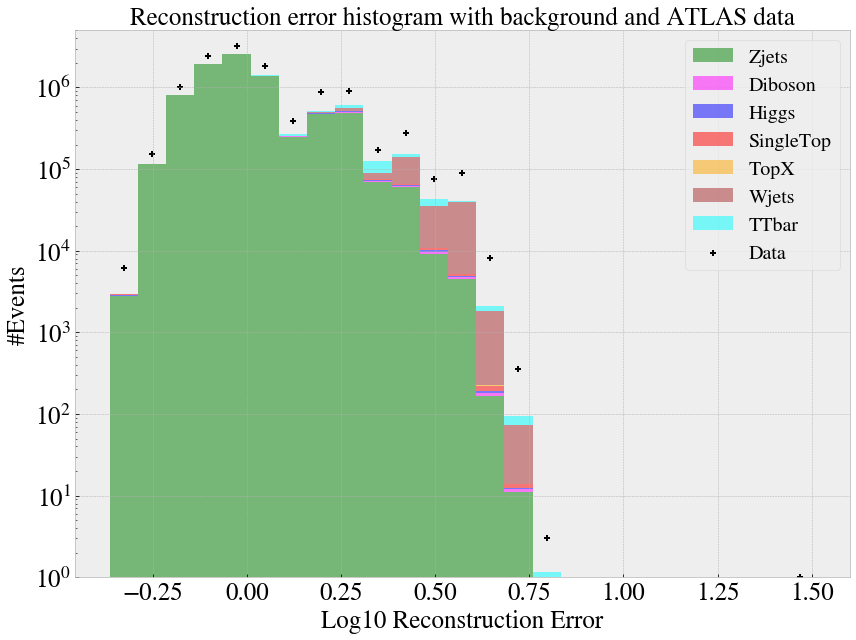

In [85]:
histo_atlas = [zjet , Diboson,
               Higgs, singletop,
               topx , wjets, ttbar ]
weight_atlas_data = [zjet_w , Diboson_w,
               Higgs_w, singletop_w,
               topx_w , wjets_w, ttbar_w ]

N, bins = np.histogram(norm_recon_data, bins = 25, weights=data_weights)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

plt.rcParams["figure.figsize"] = (12,9)

fig, ax = plt.subplots()

n_bins= bins
colors = ["green", "magenta", "blue","red", "orange", "brown", "cyan"]
labels= ["Zjets", "Diboson", "Higgs", "SingleTop", "TopX", "Wjets", "TTbar"]
ax.hist(histo_atlas, 
        n_bins, 
        density=False, 
        stacked=True, 
        alpha=0.5, 
        histtype='bar', 
        color=colors, 
        label=labels, 
        weights=weight_atlas_data
        )

ax.scatter(x, N, marker="+", label="Data", color="black")

ax.legend(prop={'size': 20})
ax.set_title('Reconstruction error histogram with background and ATLAS data', fontsize=25)
ax.set_xlabel('Log10 Reconstruction Error', fontsize=25)
ax.set_ylabel('#Events', fontsize=25)
#ax.set_xlim([0, 3.5])
ax.set_ylim([1, 5e6])
ax.set_yscale('log')
ax.tick_params(axis='both', labelsize=25)
fig.tight_layout()
plt.savefig("b_data_recon_big_rm3_feats.pdf")
plt.show()

In [51]:
scale = np.sum(test_weights[np.where(test_labels==1)])/np.sum(test_weights[np.where(test_labels == 0)])
print(scale)


0.0856745729832126


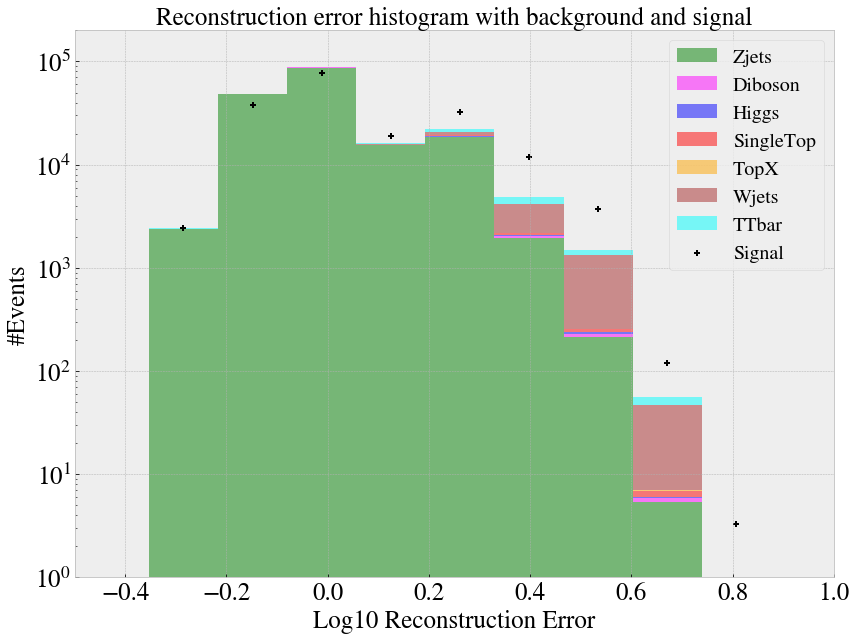

In [69]:
import plot_set

#, norm_recon_data])

b_s_backpred = b_s[np.where(test_labels==0)]
b_s_sigpred = b_s[np.where(test_labels==1)]

szjet = b_s_backpred[np.where(test_categories == 'Zjets')]
sDiboson =  b_s_backpred[np.where(test_categories == 'Diboson')]
sHiggs =  b_s_backpred[np.where(test_categories == 'Higgs')]
ssingletop =  b_s_backpred[np.where(test_categories == 'singleTop')]
stopx = b_s_backpred[np.where(test_categories == 'topX')]
swjets =  b_s_backpred[np.where(test_categories == 'Wjets')]
sttbar =  b_s_backpred[np.where(test_categories == 'ttbar')]


weight_histo =  test_weights[np.where(test_labels == 0)]*scale


szjet_w = weight_histo[np.where(test_categories == 'Zjets')]
sDiboson_w =  weight_histo[np.where(test_categories == 'Diboson')]
sHiggs_w =  weight_histo[np.where(test_categories == 'Higgs')]
ssingletop_w =  weight_histo[np.where(test_categories == 'singleTop')]
stopx_w = weight_histo[np.where(test_categories == 'topX')]
swjets_w =  weight_histo[np.where(test_categories == 'Wjets')]
sttbar_w =  weight_histo[np.where(test_categories == 'ttbar')]




histo_data = [szjet , sDiboson,
               sHiggs, ssingletop,
               stopx , swjets, sttbar ]
weight_histo = [szjet_w , sDiboson_w,
               sHiggs_w, ssingletop_w,
               stopx_w , swjets_w, sttbar_w ]



#weight_histo = [np.concatenate((b_val_weights, s_test_weights), 0), b_train_weights*scale]

plt.rcParams["figure.figsize"] = (12,9)

fig, ax = plt.subplots()

N, bins = np.histogram(b_s_sigpred, bins = 35, weights=test_weights[np.where(test_labels==1)])
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2



n_bins= bins
colors = ["green", "magenta", "blue","red", "orange", "brown", "cyan"]
labels= ["Zjets", "Diboson", "Higgs", "SingleTop", "TopX", "Wjets", "TTbar"]
ax.hist(histo_data, 
        n_bins, 
        density=False, 
        stacked=True, 
        alpha=0.5,
        histtype='bar',
        color=colors, 
        label=labels, 
        weights=weight_histo
        )

ax.scatter(x, N, marker="+", color="black", label="Signal")

ax.legend(prop={'size': 20})
ax.set_title('Reconstruction error histogram with background and signal', fontsize=25)
ax.set_xlabel('Log10 Reconstruction Error', fontsize=25)
ax.set_ylabel('#Events', fontsize=25)
ax.set_yscale('log')
ax.set_xlim([-0.5, 1])
ax.set_ylim([1, 2*10**5])
plt.tick_params(axis='both', labelsize=25)

fig.tight_layout()
plt.savefig("b_s_recon_big_rm3_feats.pdf")
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# ROC
Y_b = np.zeros(test_labels[np.where(test_labels==0)].shape[0]).reshape(test_labels[np.where(test_labels==0)].shape[0],1);
Y_s = np.ones(test_labels[np.where(test_labels==1)].shape[0]).reshape(test_labels[np.where(test_labels==1)].shape[0],1);
Y_ROC = np.concatenate((Y_b, Y_s),0);



sample_weight = np.concatenate((test_weights[np.where(test_labels == 0)]*scale, test_weights[np.where(test_labels==1)]),0)

print(np.shape(sample_weight))


rec_errors_ROC = np.concatenate((b_s_backpred,b_s_sigpred),0)




fpr, tpr, thresholds = roc_curve(Y_ROC, rec_errors_ROC, sample_weight = sample_weight, pos_label=1)

sorted_index = np.argsort(fpr)
fpr =  np.array(fpr)[sorted_index]
tpr = np.array(tpr)[sorted_index]
ae_auc = auc(fpr, tpr)

figRocAE, axRocAE = plt.subplots()
figRocAE.set_size_inches(12,12)
axRocAE.plot(fpr, tpr, label='ROC curve')
axRocAE.plot([0, 1], [0, 1], 'k--')
axRocAE.set_xlim([0.0, 1.0])
axRocAE.set_ylim([0.0, 1.05])
axRocAE.set_xlabel('False Anomaly Rate', fontsize=25)
axRocAE.set_ylabel('True Anomaly Rate', fontsize=25)
axRocAE.text(0.4,0.2,"AUC = %.4f" % ae_auc,fontsize=15)
axRocAE.set_title("Autoencoder ROC", fontsize=25)
plt.tick_params(axis='both', labelsize=25)
axRocAE.legend(fontsize=25)
fig.tight_layout()
plt.savefig("b_s_roc_curve_big_rm3feats.pdf")
plt.show()